In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [287]:
df = pd.read_csv('./data/Serie_Total2016.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df = df.loc[df.timestamp.dt.hour < 20]
df.head(10)

,element_key,latitude,longitude,timestamp,occupation_perc,prcp,tmax,tmin
0,35693,47.619158,-122.346457,2016-01-02 00:00:00,28.57,0.0,42,25
1,53549,47.628175,-122.341132,2016-01-02 00:00:00,3.12,0.0,42,25
2,11881,47.619156,-122.333107,2016-01-02 02:00:00,10.00,0.0,42,25
3,9393,47.621441,-122.335970,2016-01-02 03:00:00,20.00,0.0,42,25
4,11133,47.619815,-122.348131,2016-01-02 04:00:00,20.00,0.0,42,25
5,31310,47.619256,-122.339661,2016-01-02 04:00:00,9.09,0.0,42,25
6,13130,47.620816,-122.345711,2016-01-02 04:00:00,22.22,0.0,42,25
7,53126,47.616374,-122.341452,2016-01-02 04:00:00,9.09,0.0,42,25
8,36142,47.617287,-122.338056,2016-01-02 05:00:00,16.67,0.0,42,25
9,76433,47.622804,-122.339860,2016-01-02 05:00:00,9.09,0.0,42,25


In [286]:
df.shape[0]

4113518

# Funciones estadísticas

In [280]:
from scipy.stats import norm, t, beta

# Distribución de temperaturas


## Temperatura máxima

In [250]:
mu = df['tmax'].mean()
s = df['tmax'].std()
print("Temperatura máxima media de la muestra: %.2fºF" % mu)
print("Desviación típica de la Temperatura máxima de la muestra: %.2fºF" % s)

Temperatura máxima media de la muestra: 62.93ºF
Desviación típica de la Temperatura máxima de la muestra: 12.68ºF


Text(0,0.5,'Densidad de probabilidad')

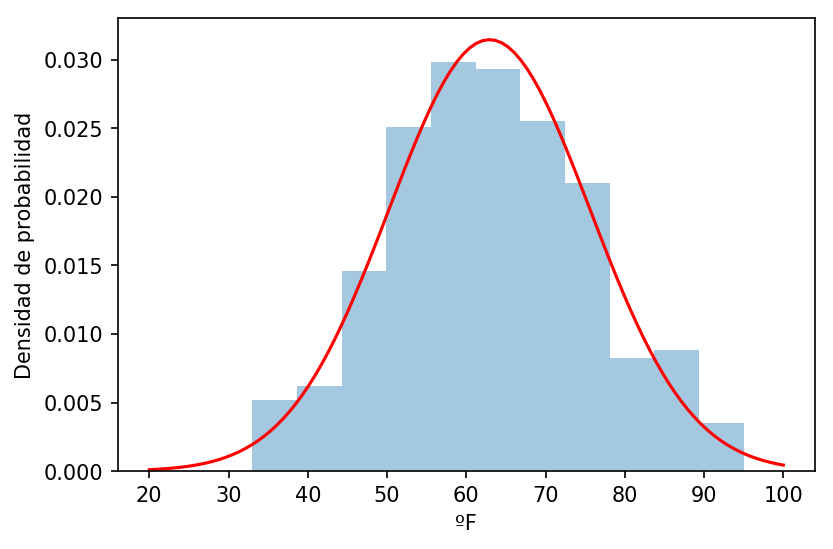

In [256]:
plt.figure(dpi=150)
sns.distplot(df['tmax'], bins=11, kde=False, norm_hist=True)
x = np.linspace(20,100, 100)
rv = norm(loc=mu, scale=s)
plt.plot(x, rv.pdf(x), color='r')
plt.xlabel("ºF")
plt.ylabel("Densidad de probabilidad")

Muestra grande, varianza poblacional desconocida

$ \Big(\bar{x}-z_{\alpha/2}\cdot\dfrac{s}{\sqrt{N}}, \;\bar{x}+z_{\alpha/2}\cdot\dfrac{s}{\sqrt{N}}\Big), \; 1-\alpha  $

In [163]:
def confint_mean_normal(x, s, N, alpha):
    from scipy.stats import norm
    import numpy as np
    import pandas as pd
    
    rv = norm()
    za = np.abs(rv.ppf(alpha/2))
    mu_i = x-za*s/np.sqrt(N)
    mu_s = x+za*s/np.sqrt(N)
    return pd.DataFrame({str(100*(alpha/2))+"%": [mu_i], str(100*(1-alpha/2))+"%": [mu_s]})  

Muestra grande, media poblacional desconocida

$ \Big(\dfrac{Ns^2}{\chi^2_{\alpha/2}}, \dfrac{Ns^2}{\chi^2_{1-\alpha/2}} \Big), \; 1-\alpha  $

In [164]:
def confint_variance(s, N, alpha):
    from scipy.stats import chi2
    import numpy as np
    import pandas as pd
    
    rv = chi2(N)
    x1 = rv.ppf(alpha/2)
    x2 = rv.ppf(1-alpha/2)
    s_i = np.sqrt(N*s**2/max(x1,x2))
    s_s = np.sqrt(N*s**2/min(x1,x2))
    
    return pd.DataFrame({str(100*(alpha/2))+"%": [s_i], str(100*(1-alpha/2))+"%": [s_s]})
    

In [165]:
confint_mean_normal(mu, s, df.shape[0], 0.05)

,2.5%,97.5%
0,62.915133,62.939637


In [166]:
confint_variance(s, df.shape[0], 0.05)

,2.5%,97.5%
0,12.669637,12.686963


## Temperatura mínima

In [258]:
mu = df['tmin'].mean()
s = df['tmin'].std()
print("Temperatura máxima media de la muestra: %.2fºF" % mu)
print("Desviación típica de la Temperatura máxima de la muestra: %.2fºF" % s)

Temperatura máxima media de la muestra: 47.76ºF
Desviación típica de la Temperatura máxima de la muestra: 8.15ºF


Text(0,0.5,'Densidad de probabilidad')

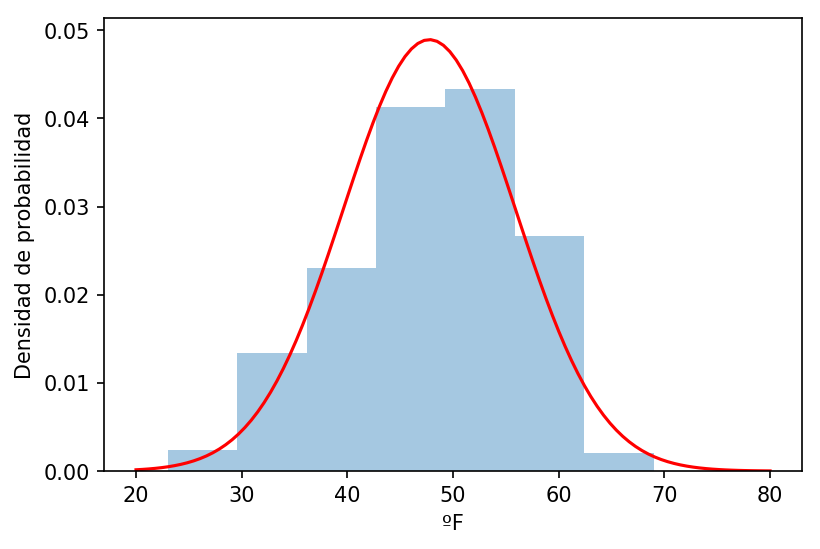

In [268]:
plt.figure(dpi=150)
sns.distplot(df['tmin'], bins=7, kde=False, norm_hist=True)
x = np.linspace(20,80, 100)
rv = norm(loc=mu, scale=s)
plt.plot(x, rv.pdf(x), color='r')
plt.xlabel("ºF")
plt.ylabel("Densidad de probabilidad")

In [169]:
confint_mean_normal(mu, s, df.shape[0], 0.05)

,2.5%,97.5%
0,47.754053,47.769807


In [170]:
confint_variance(s, df.shape[0], 0.05)

,2.5%,97.5%
0,8.14581,8.15695


# Distribución de precipitaciones

In [281]:
mu = df['prcp'].mean()
s = df['prcp'].std()
print("Precipitación media de la muestra: %.2f" % mu)
print("Desviación típica de la precipitación de la muestra: %.2f" % s)

Precipitación media de la muestra: 0.13
Desviación típica de la precipitación de la muestra: 0.26


Text(0,0.5,'Densidad de probabilidad')

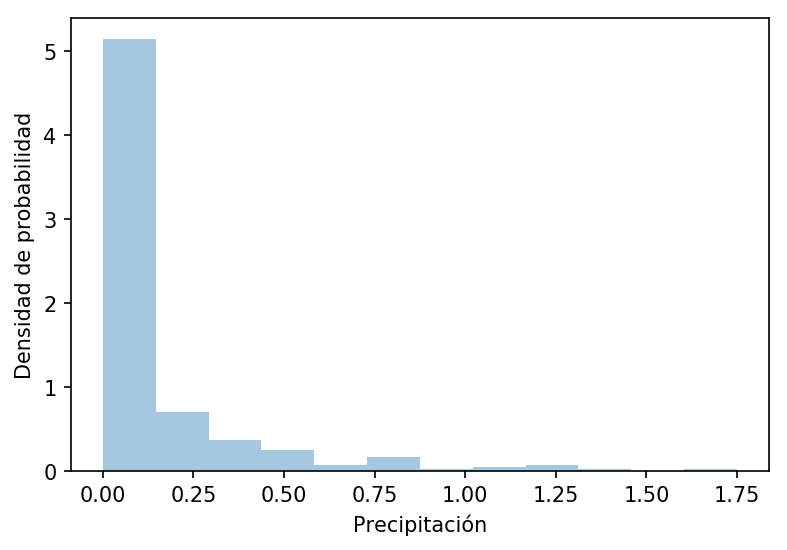

In [288]:
plt.figure(dpi=150)
sns.distplot(df['prcp'], bins=12, kde=False, norm_hist=True)
plt.xlabel("Precipitación")
plt.ylabel("Densidad de probabilidad")

In [173]:
confint_mean_normal(mu, s, df.shape[0], 0.05)

,2.5%,97.5%
0,0.1266,0.127093


In [174]:
confint_variance(s, df.shape[0], 0.05)

,2.5%,97.5%
0,0.254893,0.255242


# Distribución del porcentaje de ocupación

In [177]:
mu = df['occupation_perc'].mean()
s = df['occupation_perc'].std()
print("Ocupación media de la muestra: %.2f" % mu)
print("Desviación típica de la ocupación de la muestra: %.2f" % s)

Ocupación media de la muestra: 50.81
Desviación típica de la ocupación de la muestra: 40.08


Text(0,0.5,'Densidad de probabilidad')

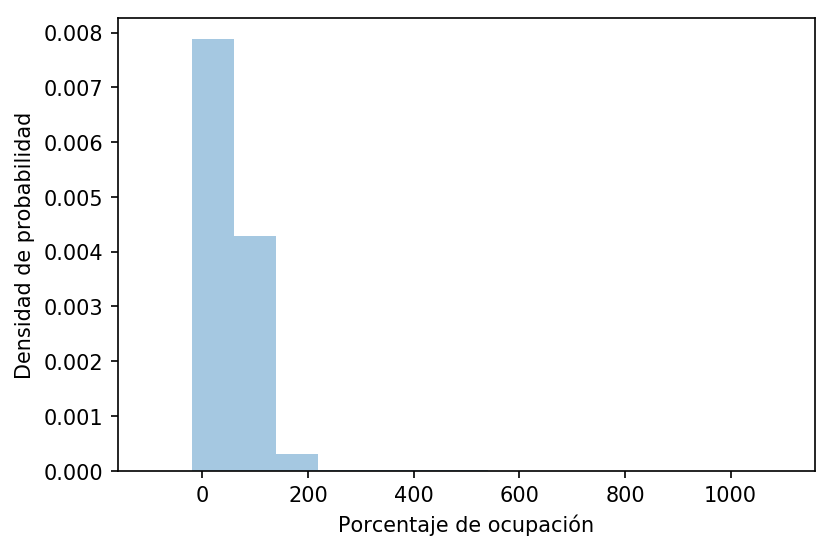

In [289]:
plt.figure(dpi=150)
sns.distplot(df['occupation_perc'], bins=15, kde=False, norm_hist=True)
plt.xlabel("Porcentaje de ocupación")
plt.ylabel("Densidad de probabilidad")

In [179]:
confint_mean_normal(mu, s, df.shape[0], 0.05)

,2.5%,97.5%
0,50.771656,50.849128


In [180]:
confint_variance(s, df.shape[0], 0.05)

,2.5%,97.5%
0,40.0565,40.11128


# Correlaciones entre las covariantes y el target
Correlación de Pearson. Se dan dos p-valor. El primero es la probabilidad de que otra muestra dé el mismo coeficiente que el calculado, estando incorrelada. El otro P valor calculado se utiliza para establecer si el coeficiente es significativamente distinto de cero. Este segundo test es una comprobación del primer valor (**porque la documentación dice que es aproximado y no siempre es fiable**), y se hace mediante un t-test.

El citado t-test hace lo siguiente:
1. Calcula el coeficiente de correlación de Pearson de la muestra ($r$)
2. Calcula el estadístico $t$, que se distribuye según una t de Student con $N-2$ grados de libertad:

$t = \dfrac{r}{\sqrt{1-r^2}}\cdot \sqrt{N-2}  \sim  t_{N-2}\$

El p-valor se calcula con dos colas, como la probabilidad de obtener un valor más extremo que el estadístico calculado. Como nuestro dataset tiene muchas muestras, y $\sqrt{N-2} \gg \frac{r}{\sqrt{1-r^2}}$, los resultados casi siempre son significativos, porque el estadístico queda siempre muy a la derecha (o a la izquierda) del valor crítico.

**La conclusión que se demuestra a continuación es que no hay evidencia de que haya correlaciones significativas entre las covariantes y el porcentaje de ocupación. Además, la evidencia es muy fuerte debido al número de muestras del dataset.**

In [149]:
from scipy.stats import pearsonr

In [232]:
def t_test_pearson(r, N):
    from scipy.stats import t
    import numpy as np
    st = r*np.sqrt(N-2)/np.sqrt(1-r**2)
    p = 2*t(N-2).cdf(-abs(st))
    return (st,p)

In [233]:
t_test_pearson(0.006, df.shape[0])

(12.169301841464167, 4.53552211585125e-34)

In [214]:
t(df.shape[0]).ppf(0.025)

-1.9599645612415337

In [234]:
(r, p) = pearsonr(df['occupation_perc'], df['tmax'])
print("Correlación entre 'occupation_perc' y 'tmax' = %.3f (p= %.3e)" %(r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'occupation_perc' y 'tmax' = 0.004 (p= 1.563e-15)
¿Significativamente distinto de cero? Sí: p = 1.563e-15


In [235]:
(r, p) = pearsonr(df['occupation_perc'], df['tmin'])
print("Correlación entre 'occupation_perc' y 'tmin' = %.3f (p = %.2e)" % (r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'occupation_perc' y 'tmin' = 0.006 (p = 4.23e-39)
¿Significativamente distinto de cero? Sí: p = 4.226e-39


In [236]:
(r, p) = pearsonr(df['occupation_perc'], df['prcp'])
print("Correlación entre 'occupation_perc' y 'tmax' = %.3f (p = %.2e)" % (r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'occupation_perc' y 'tmax' = -0.006 (p = 4.82e-29)
¿Significativamente distinto de cero? Sí: p = 4.824e-29


In [237]:
(r, p) = pearsonr(df['occupation_perc'], df['latitude'])
print("Correlación entre 'occupation_perc' y 'latitude' = %.3f (p = %.2e)" % (r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'occupation_perc' y 'latitude' = 0.068 (p = 0.00e+00)
¿Significativamente distinto de cero? Sí: p = 0.000e+00


In [238]:
(r, p) = pearsonr(df['occupation_perc'], df['longitude'])
print("Correlación entre 'occupation_perc' y 'longitude' = %.3f (p = %.2e)" % (r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'occupation_perc' y 'longitude' = -0.110 (p = 0.00e+00)
¿Significativamente distinto de cero? Sí: p = 0.000e+00


In [240]:
(r, p) = pearsonr(df['occupation_perc'], df.timestamp.dt.hour)
print("Correlación entre 'occupation_perc' y la hora  = %.3f (p = %.2e)" % (r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'occupation_perc' y la hora  = 0.015 (p = 9.61e-208)
¿Significativamente distinto de cero? Sí: p = 9.606e-208


In [242]:
(r, p) = pearsonr(df['occupation_perc'], df.timestamp.dt.day)
print("Correlación entre 'occupation_perc' y el día del mes  = %.3f (p = %.2e)" % (r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'occupation_perc' y el día del mes  = 0.003 (p = 8.21e-08)
¿Significativamente distinto de cero? Sí: p = 8.214e-08


In [243]:
(r, p) = pearsonr(df['occupation_perc'], df.timestamp.dt.month)
print("Correlación entre 'occupation_perc' y el mes  = %.3f (p = %.2e)" % (r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'occupation_perc' y el mes  = -0.003 (p = 6.50e-10)
¿Significativamente distinto de cero? Sí: p = 6.498e-10


# Correlaciones entre las covariantes (entre sí)

A continuación se repite el análisis para estudiar si hay correlaciones entre las covariantes. Este análisis puede llevarnos a descrubir si hay multicolinealidad que pudiera afectar a la parte regresiva de los modelos espacio-temporales. 

In [244]:
(r, p) = pearsonr(df['tmin'], df['tmax'])
print("Correlación entre 'tmin' y 'tmax' = %.3f (p= %.3e)" %(r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'tmin' y 'tmax' = 0.878 (p= 0.000e+00)
¿Significativamente distinto de cero? Sí: p = 0.000e+00


In [247]:
(r, p) = pearsonr(df['prcp'], df['tmax'])
print("Correlación entre 'prcp' y 'tmax' = %.3f (p= %.3e)" %(r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'prcp' y 'tmax' = -0.275 (p= 0.000e+00)
¿Significativamente distinto de cero? Sí: p = 0.000e+00


In [246]:
(r, p) = pearsonr(df['prcp'], df['tmin'])
print("Correlación entre 'prcp' y 'tmin' = %.3f (p= %.3e)" %(r,p))
print("¿Significativamente distinto de cero? Sí: p = %.3e" % t_test_pearson(r, df.shape[0])[1])

Correlación entre 'prcp' y 'tmin' = -0.108 (p= 0.000e+00)
¿Significativamente distinto de cero? Sí: p = 0.000e+00


In [296]:
def plot_cdf(num_bins, data, label):
    counts, bin_edges = np.histogram (data, bins=num_bins, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bin_edges[1:], cdf/cdf[-1], label=label)


Text(0,0.5,'CDF')

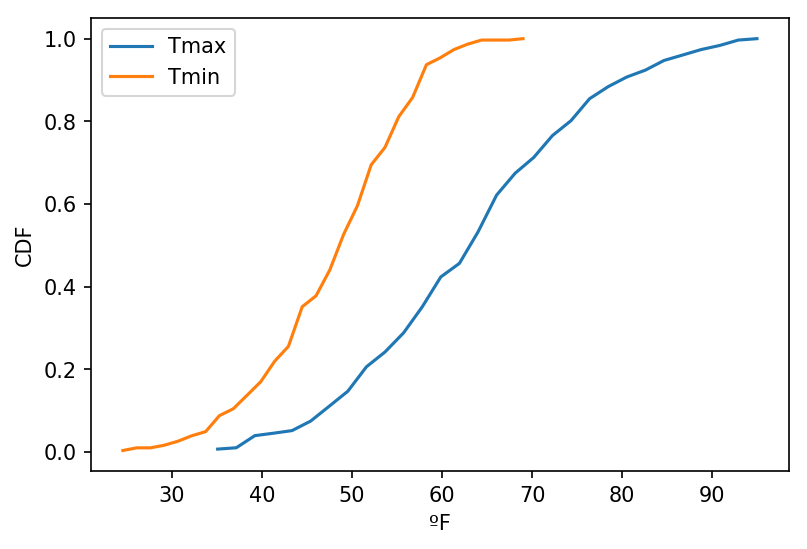

In [299]:
plt.figure(dpi=150)
plot_cdf(30, df['tmax'], label='Tmax')
plot_cdf(30, df['tmin'], label='Tmin')
plt.legend()
plt.xlabel('ºF')
plt.ylabel('CDF')

In [304]:
from scipy.stats import ks_2samp

ks_2samp(df['tmax'], df['tmin'])

Ks_2sampResult(statistic=0.5432347688766648, pvalue=0.0)

* Sólo aparece correlación significativa entre **tmax** y **tmin**, del orden de 0.9, y con una significación estadística fuerte. Esto podría tener sentido, pues tmax y tmin formarían parte de la misma variable: 'temperatura durante el día'. Si la temperatura media durante el día sube, normalmente suben tanto la mínima como la máxima, salvo en casos extremos.
* El resto de variables están muy poco correlacionadas, teniendo el análisis mucha significación estadística.

Los valores extremos de p que se están obteniendo se debe a que $N$ es muy grande, y las conclusiones se han obtenido con muchísimos datos, por lo que la mayoría de tests estadísticos van a salir muy significativos. 

# Bibliografía

- G. Kanji, *100 statistical tests*, Third Edition, SAGE Publications LTD, 2006
- G. Casella, L. Berger, *Statistical Inference*, Second Edition, Duxbury Advanced Series, 2002.